# 120 Years of Olympics History

# About this Dataset

The Dataset consists of 120 years Olympics data from Athens 1986 to Rio 2016, including all the games and Athlets.


#Content

The0 dataset contain 271116 rows and 18 columns. Each row corresponds to an individual athlete competing in an individual Olympic event.
The columns are:

ID - Unique number for each athlete 

Name - Athlete's name

Sex - M or F

Age - Integer

Height - In centimeters

Weight - In kilograms

Team - Team name

NOC - National Olympic Committee 3-letter code

Games - Year and season

Year - Integer

Season - Summer or Winter

City - Host city

Sport - Sport

Event - Event

Medal - Gold, Silver, Bronze, or NA


This dataset provides an opportunity to ask questions about how the Olympics have evolved over time, including questions about the participation and performance of women, different nations, and different sports and events.


Data Preparation

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
plt.rcParams['figure.figsize'] = (15,7)
import warnings
warnings.filterwarnings('ignore')



In [20]:
data=pd.read_csv(r"D:\marlabs\Datasets\athlets.csv")#athlets-events data
data1=pd.read_csv(r"D:\marlabs\Datasets\noc.csv")#region names and codes


In [21]:
#merging two datasets
df=pd.merge(data,data1,on='NOC',how='outer')

In [22]:
df.shape

(271117, 17)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271117 entries, 0 to 271116
Data columns (total 17 columns):
ID        271116 non-null float64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271117 non-null object
Games     271116 non-null object
Year      271116 non-null float64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270747 non-null object
notes     5039 non-null object
dtypes: float64(5), object(12)
memory usage: 37.2+ MB


In [24]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602.0,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000.0,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463.0,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004.0,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464.0,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [25]:
#  dropping the duplicates from the dataset.
print(data.shape)
data = data.drop_duplicates(keep='first')
print(data.shape)

(271116, 15)
(269731, 15)


In [26]:
df.isnull().sum()

ID             1
Name           1
Sex            1
Age         9475
Height     60172
Weight     62876
Team           1
NOC            0
Games          1
Year           1
Season         1
City           1
Sport          1
Event          1
Medal     231334
region       370
notes     266078
dtype: int64

In [27]:
df[df['ID'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Singapore,NaN


In [28]:
#deleting the row where all the columns are null
df=df.dropna(subset=['ID'])

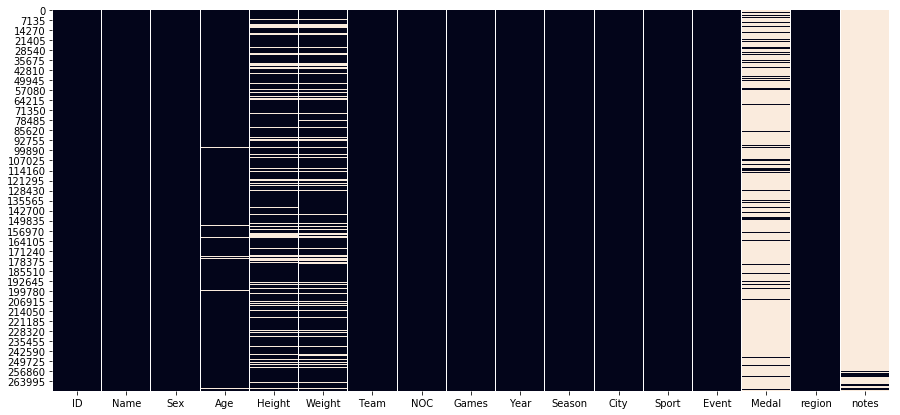

In [29]:
sns.heatmap(df.isnull(), cbar=False)

In [30]:
#dropping the notes column 
df=df.drop(['notes'],axis=1)

In [35]:
df=df.rename(columns={'Sex':'Gender'})

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Singapore,NaN


In [31]:
#filling NaN values in Medal column with No_medal
df["Medal"].fillna("No_medal", inplace = True) 

In [32]:
#filling Nan region values with corresponding Team values
df['region'] = np.where(df['region'].isnull(), df['Team'], df['region'])

In [36]:
#replacing Age-missing values with mean of that column
df["Age"].fillna(df['Age'].mean(), inplace = True) 

In [37]:
#replacing missing values in Height column with mean value based on Gender 
df['Height'] = df.groupby(['Gender'])['Height']\
    .transform(lambda x: x.fillna(x.mean()))

In [38]:
#replace missing values in Weight column with mean value based on Gender
df['Weight'] = df.groupby(['Gender'])['Weight']\
    .transform(lambda x: x.fillna(x.mean()))

In [19]:
df.isnull().sum()

ID        0
Name      0
Gender    0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

In [53]:
#Adding a new column BMI
cm_to_mtr=0.01
df['Height']*=cm_to_mtr

In [54]:
df['BMI']=round(df['Weight']/(df['Height']**2))

In [55]:
df.head(2)

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,BMI
0,1,A Dijiang,M,24,1.8,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_medal,China,25.0
1,2,A Lamusi,M,23,1.7,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_medal,China,21.0


In [56]:
cm_to_mtr=100
df['Height']*=cm_to_mtr

In [57]:
df['Year']=df['Year'].astype(int)
df['Height']=df['Height'].astype(int)
df['ID']=df['ID'].astype(int)
df['Weight']=df['Weight'].astype(int)
df['Age']=df['Age'].astype(int)


In [58]:
d=df.copy()

In [59]:
df.head(1)

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,BMI
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_medal,China,25.0


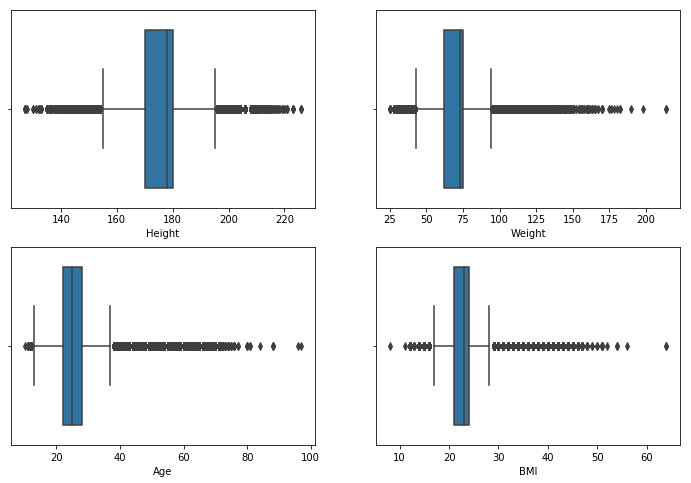

In [60]:
x,y=plt.subplots(2,2,figsize=(12,8))
sns.boxplot(df.Height,ax=y[0,0])
sns.boxplot(df.Weight,ax=y[0,1])
sns.boxplot(df.Age,ax=y[1,0])
sns.boxplot(df.BMI,ax=y[1,1])

In [61]:
d=d[np.abs(d.Age-d.Age.mean()) <= (3*d.Age.std())]
d=d[np.abs(d.Height-d.Height.mean()) <= (3*d.Height.std())]
d=d[np.abs(d.Weight-d.Weight.mean()) <= (3*d.Weight.std())]
d=d[np.abs(d.BMI-d.BMI.mean()) <= (3*d.BMI.std())]

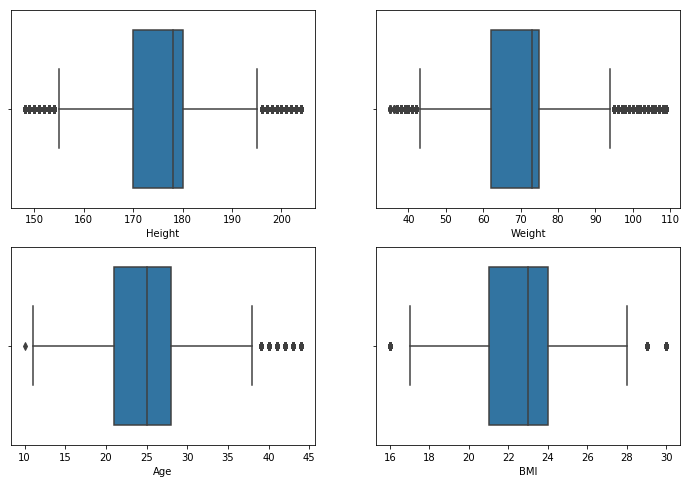

In [62]:
x,y=plt.subplots(2,2,figsize=(12,8))
sns.boxplot(d.Height,ax=y[0,0])
sns.boxplot(d.Weight,ax=y[0,1])
sns.boxplot(d.Age,ax=y[1,0])
sns.boxplot(d.BMI,ax=y[1,1])

# Data Analysis & Visualization

In [63]:
#Total number of Participants
len(df.ID.unique())

135571

In [64]:
#Number of participants by Gender
Gender_ratio=pd.DataFrame(df.groupby('Gender')['Name'].nunique())

In [65]:
Gender_ratio=(100. * Gender_ratio / Gender_ratio.sum()).round(0)

In [66]:

Gender_ratio

,Name
Gender,
F,25.0
M,75.0


In [67]:
Gender_ratio.reset_index(level=0, inplace=True)

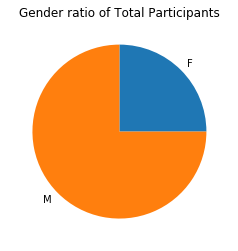

In [36]:
plt.pie(Gender_ratio.Name,labels=Gender_ratio.Gender)
plt.title('Gender ratio of Total Participants')
plt.show()

Country_wise insights
#Top 5 countries with Most number of Athletes
#Top 5 countries with Highest Number of Medals
#Winning ratio of Top 5 countries
#Top 10 countries Medals distribution

In [68]:
country=df.groupby(['region','ID'])['ID'].nunique().reset_index(name='count')
athl_country=country.groupby(['region'])['count'].count().reset_index().sort_values('count',ascending=False)[:5] 

In [69]:
#Top 5 with Highest Participation
athl_country

,region,count
198,USA,9653
67,Germany,7575
197,UK,6281
63,France,6170
154,Russia,5610


In [71]:
medal_country=df[df['Medal']!='No_medal'][['region','Year','Event','Medal']]
medal_country=medal_country.groupby(['region'])['Medal'].count().sort_values(ascending=False).reset_index()[:5]


In [72]:
#Top 5 With Highest Medals
medal_country

,region,Medal
0,USA,5637
1,Russia,3947
2,Germany,3756
3,UK,2068
4,France,1777


In [73]:
country_winning_ratio=pd.merge(athl_country,medal_country,how='outer')



In [74]:
country_winning_ratio['winning_ratio']=country_winning_ratio['Medal']/country_winning_ratio['count']*100

In [75]:
country_winning_ratio

,region,count,Medal,winning_ratio
0,USA,9653,5637,58.396353
1,Germany,7575,3756,49.584158
2,UK,6281,2068,32.924694
3,France,6170,1777,28.800648
4,Russia,5610,3947,70.356506


In [76]:
country_winning_ratio['winning_ratio']=country_winning_ratio['winning_ratio'].round()

In [77]:
#Winning Ratio of Top 5 Countries
country_winning_ratio

,region,count,Medal,winning_ratio
0,USA,9653,5637,58.0
1,Germany,7575,3756,50.0
2,UK,6281,2068,33.0
3,France,6170,1777,29.0
4,Russia,5610,3947,70.0


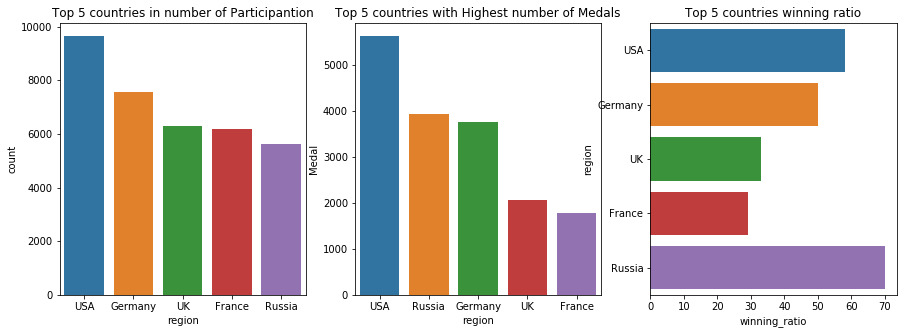

In [78]:
f,ax=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=athl_country,x='region',y='count',ax=ax[0])
ax[0].set_title('Top 5 countries in number of Participantion')
sns.barplot(data=medal_country,x='region',y='Medal',ax=ax[1])
ax[1].set_title('Top 5 countries with Highest number of Medals')
sns.barplot(x='winning_ratio',y='region',data=country_winning_ratio,ax=ax[2])
ax[2].set_title('Top 5 countries winning ratio')
plt.show()


In [79]:
country_wise=df[df['Medal']!='No_medal'][['region','Games','Event','Medal']]

In [80]:
len(country_wise)

39783

In [81]:
country_wise.groupby('Medal')['region'].count()

Medal
Bronze    13295
Gold      13372
Silver    13116
Name: region, dtype: int64

In [82]:
c_m=country_wise.groupby(['region'])['Medal'].count().sort_values(ascending=False).reset_index()[:10]

In [83]:
c_gsb=country_wise.groupby(['region','Medal'])['Games'].count().sort_values(ascending=False).reset_index()

In [84]:
c10_m=pd.DataFrame()
for x in c_m.region:
    dn=c_gsb[c_gsb.region==x]
    c10_m=c10_m.append(dn)
    

In [85]:
gsb_c=c10_m.pivot(index='region',columns='Medal',values='Games')


In [86]:
gsb_c['region1']=gsb_c.index
gsb_c=gsb_c.sort_values('Gold',ascending=False)
gsb_c.index = np.arange(1, len(gsb_c)+1)


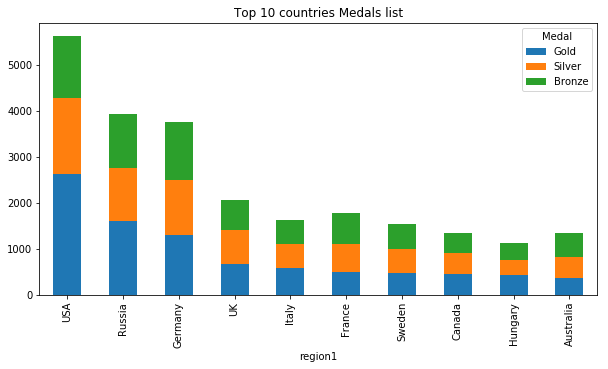

In [112]:
gsb_c.plot(x='region1', y=['Gold', 'Silver','Bronze'], figsize=(10,5),kind='bar',\
           title='Top 10 countries Medals list',stacked=True)
plt.show()


Season-wise Insights
#Total number of Athletes participated in each Season
#Gender wise athletes in each season
#Number of Athletes,Nations,Events changed over time


In [87]:
season_wise=df[df['Medal']!='No_medal'][['Season','Gender','region','Medal']]

In [88]:
season_wise.groupby(['Season'])['Medal'].count().reset_index()

,Season,Medal
0,Summer,34088
1,Winter,5695


In [89]:
a=season_wise.groupby(['Season','Gender'])['Medal'].count().reset_index()

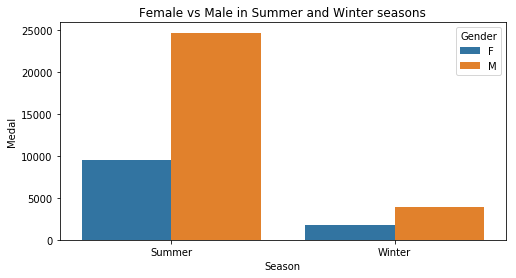

In [91]:
fig,ax=plt.subplots(figsize=(8,4))
sns.barplot(data=a,x='Season',y='Medal',hue='Gender')
ax.set_title('Female vs Male in Summer and Winter seasons')
plt.show()

In [92]:
#number of events,athlets,nations  excluding Art competition
Events=df[df['Sport']!='Art Competitions'].groupby(['Year','Season']).Event.nunique().reset_index(name='Events')
Athlets=df[df['Sport']!='Art Competitions'].groupby(['Year','Season']).ID.nunique().reset_index(name='Athlets')
Nations=df[df['Sport']!='Art Competitions'].groupby(['Year','Season']).NOC.nunique().reset_index(name='Nations')


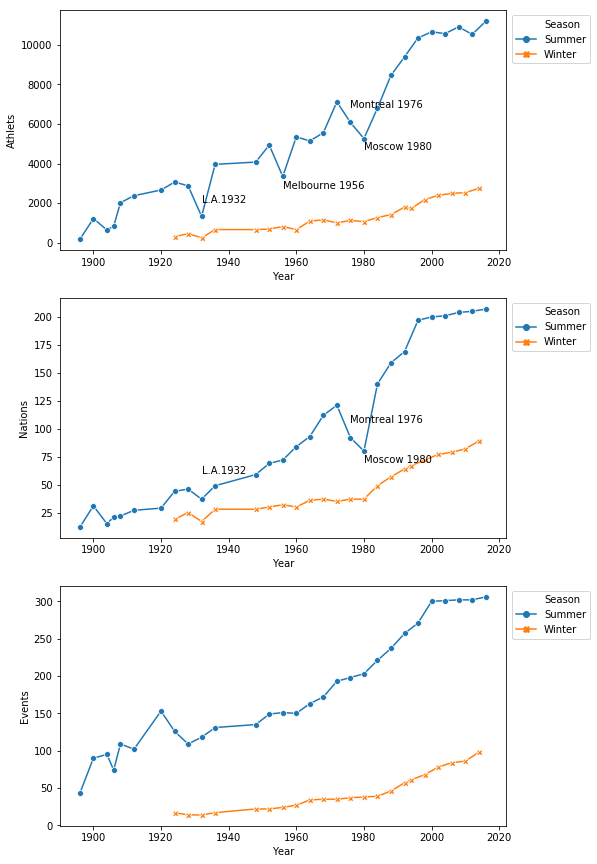

In [93]:
fig,ax=plt.subplots(3,1,figsize=(8,15))
sns.lineplot(data=Athlets,x='Year',y='Athlets',hue='Season',style='Season',markers=True,dashes=False,ax=ax[0])
ax[0].annotate(s=('L.A.1932'),xy=(1932,2000))
ax[0].annotate(s=('Melbourne 1956'),xy=(1956,2750))
ax[0].annotate(s=('Montreal 1976'),xy=(1976,6800))
ax[0].annotate(s=('Moscow 1980'),xy=(1980,4700))
ax[0].legend(loc='upper right',bbox_to_anchor=(1.2,1))
sns.lineplot(data=Nations,x='Year',y='Nations',hue='Season',style='Season',markers=True,dashes=False,ax=ax[1])
ax[1].annotate(s=('L.A.1932'),xy=(1932,60))
ax[1].annotate(s=('Montreal 1976'),xy=(1976,105))
ax[1].annotate(s=('Moscow 1980'),xy=(1980,70))
ax[1].legend(loc='upper right',bbox_to_anchor=(1.2,1))
sns.lineplot(data=Events,x='Year',y='Events',hue='Season',style='Season',markers=True,dashes=False,ax=ax[2])
ax[2].legend(loc='upper right',bbox_to_anchor=(1.2,1))
plt.show()

Observations:
Two long periods between 1912-1920 and 1936-1948 due to World WarI & II.

L.A., 1932: Attendance dipped because these Games occured in the midst of the Great Depression and in a remote location, such that many athletes were unable to afford the trip to the Olympics.

Melbourne, 1956: Attendance dipped due to several boycotts.

Montreal, 1976: Attendance dipped because 25 nations, mostly African, boycotted the Games.
Moscow, 1980: Attendance dipped because 66 nations, including the U.S., boycotted the Games in response to the Soviet invasion of Afghanistan.

Year-wise insights

In [127]:
nat=df[['Year','NOC']]

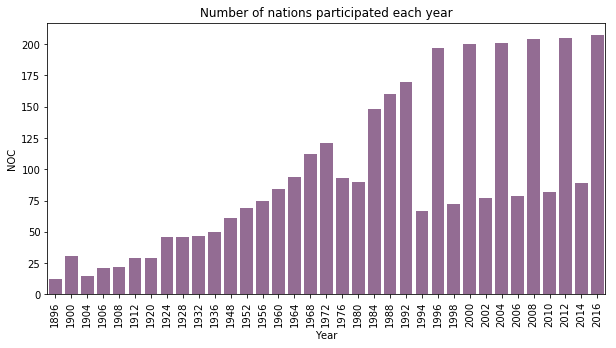

In [128]:
#Number of nations participated over time
nat1=nat.groupby(['Year'])['NOC'].nunique().reset_index()
fig,ax=plt.subplots(figsize=(10,5))
x=sns.barplot(data=nat1,x='Year',y='NOC',color=(0.6, 0.4, 0.6, 0.6))
plt.xticks(rotation='vertical')
ax.set_title("Number of nations participated each year")
plt.show()


the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. 



In [61]:
#Medals tally each Year
year_wise=df[df['Medal']!='No_medal'].groupby(['Year','region'])['Medal'].count().reset_index()
year_wise=year_wise.groupby('Year').sum().reset_index()
year_wise.head()

,Year,Medal
0,1896,143
1,1900,604
2,1904,486
3,1906,458
4,1908,831


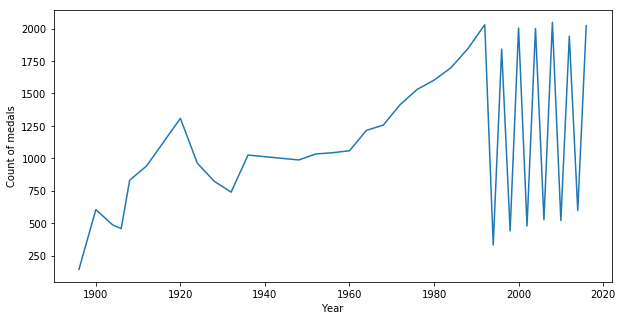

In [62]:
plt.figure(figsize=(10,5))
x=year_wise.Year
y=year_wise.Medal
plt.plot(x,y)
plt.xlabel('Year')
plt.ylabel('Count of medals')
plt.show()

#Gender_wise insights
#Male vs Female participation each year

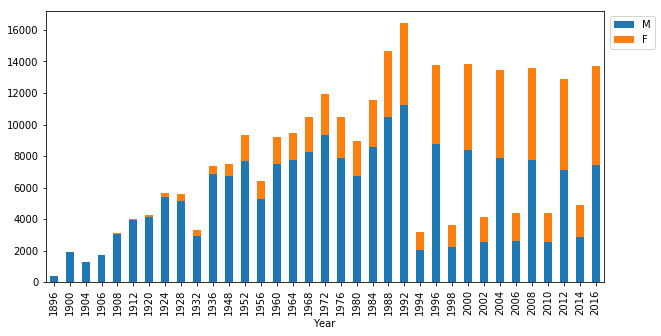

In [68]:
mvf=df[['Year','Name','Gender']]
mvf1 = mvf.groupby(['Year', 'Gender'])['Name'].count().unstack('Gender').fillna(0)
mvf1[['M','F']].plot(kind='bar',stacked=True,figsize=(10,5))
plt.legend(loc='upper right',bbox_to_anchor=(1.1,1))
plt.show()

In [69]:
ratio=df[['Gender','Medal','Year']]
ratio1=ratio.groupby(['Gender','Year'])['Medal'].count().reset_index()
ratio2=ratio[ratio['Medal']!='No_medal'].groupby(['Gender','Year'])['Medal'].count().reset_index()
ratio2.rename(columns={'Medal':'ratio'},inplace=True)

In [70]:
ratio1['ratio']=ratio2['ratio']
ratio1['ratio1']=ratio1['ratio']/ratio1['Medal']*100
ratio1['ratio1']=ratio1.ratio1.round()
ratio1['ratio1']=ratio1['ratio1'].astype(int)

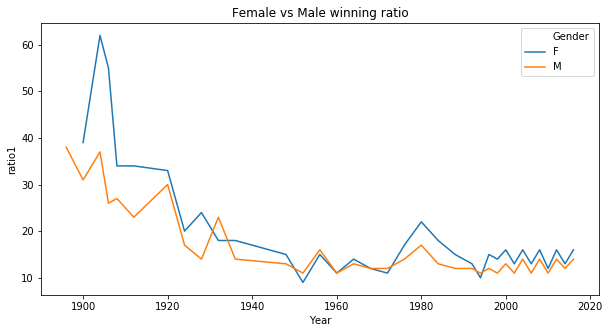

In [71]:
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(data=ratio1,x='Year',y='ratio1',hue='Gender')
ax.set_title("Female vs Male winning ratio")
plt.show()

In [72]:
gen=df[df['Medal']!='No_medal'][['Gender','Medal','Year']]
mvf1 = mvf.groupby(['Year', 'Gender'])['Name'].count().unstack('Gender').fillna(0)
gen1=gen.groupby(['Year','Gender','Medal'])['Medal'].count().reset_index(name='count')
gen2 = gen.groupby(['Year', 'Gender','Medal'])['Medal'].count().unstack('Gender').fillna(0).reset_index()

(0, 500)

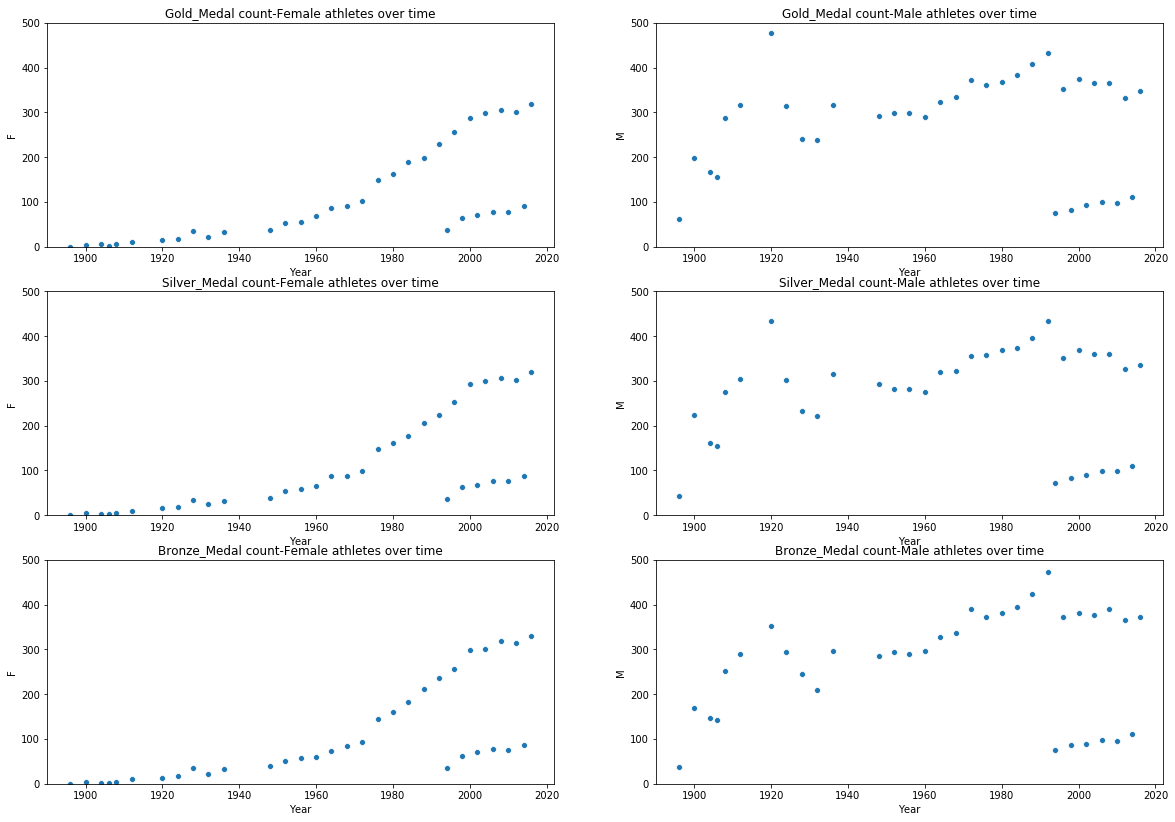

In [73]:
fig,ax=plt.subplots(3,2,figsize=(20,14))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data=gen2[gen2.Medal=='Gold'],x='Year',y='F',ax=ax[0,0])
ax[0,0].set_title('Gold_Medal count-Female athletes over time')
sns.scatterplot(data=gen2[gen2.Medal=='Silver'],x='Year',y='F',ax=ax[1,0])
ax[1,0].set_title('Silver_Medal count-Female athletes over time')
sns.scatterplot(data=gen2[gen2.Medal=='Bronze'],x='Year',y='F',ax=ax[2,0])
ax[2,0].set_title('Bronze_Medal count-Female athletes over time')
sns.scatterplot(data=gen2[gen2.Medal=='Gold'],x='Year',y='M',ax=ax[0,1])
ax[0,1].set_title('Gold_Medal count-Male athletes over time')
sns.scatterplot(data=gen2[gen2.Medal=='Silver'],x='Year',y='M',ax=ax[1,1])
ax[1,1].set_title('Silver_Medal count-Male athletes over time')
sns.scatterplot(data=gen2[gen2.Medal=='Bronze'],x='Year',y='M',ax=ax[2,1])
ax[2,1].set_title('Bronze_Medal count-Male athletes over time')
ax[0,0].set_ylim(0,500)
ax[0,1].set_ylim(0,500)
ax[1,0].set_ylim(0,500)
ax[1,1].set_ylim(0,500)
ax[2,0].set_ylim(0,500)
ax[2,1].set_ylim(0,500)

Game-wise Insights
#Who got the highest number of Medals-Game-wise
#Which country has the highest number of Medals-Gamewise

In [74]:
df3=df[df['Medal']!='No_medal'][['Name','Medal','Sport','Year']]

In [75]:
#Highest number of medals in each game-Athlete
df4=df3.groupby(['Name','Sport'])['Medal'].count().reset_index().sort_values('Medal',ascending=False)
df5=df4.groupby(['Sport'])['Medal'].max().reset_index().sort_values('Medal',ascending=False)

In [76]:
df4.head()

,Name,Sport,Medal
18165,"Michael Fred Phelps, II",Swimming,28
15380,Larysa Semenivna Latynina (Diriy-),Gymnastics,18
19440,Nikolay Yefimovich Andrianov,Gymnastics,15
19758,Ole Einar Bjrndalen,Biathlon,13
3223,Borys Anfiyanovych Shakhlin,Gymnastics,13


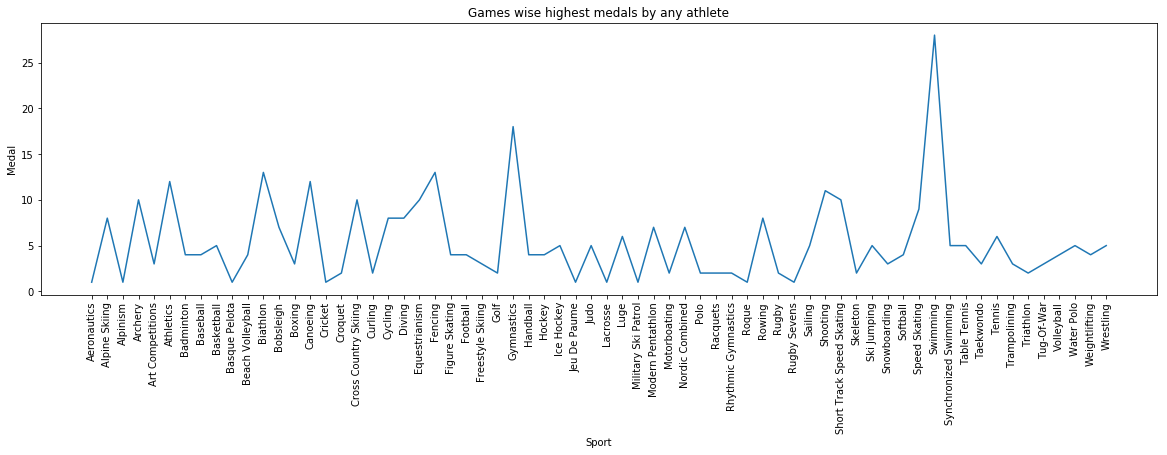

In [77]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df5,x='Sport',y='Medal')
plt.xticks(rotation='vertical')
plt.title('Games wise highest medals by any athlete')
plt.show()

In [81]:
df4=df3.groupby(['Name','Sport'])['Medal'].count().reset_index().sort_values('Medal',ascending=False)
df5=df4.groupby(['Sport'])['Medal'].max().reset_index().sort_values('Medal',ascending=False)
def athlete_max(sport):
    return df4[df4.Sport==sport].max()
athlete_max('Luge')

Name     Yves Hagen Mankel
Sport                 Luge
Medal                    6
dtype: object

In [79]:
#Highest number of Medals in each game-country
c_s=df[df['Medal']!='No_medal'][['region','Medal','Sport','Year']]

In [83]:
c_s1=c_s.groupby(['region','Sport'])['Medal'].count().reset_index().sort_values('Medal',ascending=False)
c_s2=c_s1.groupby(['Sport'])['Medal'].max().reset_index().sort_values('Medal',ascending=False)

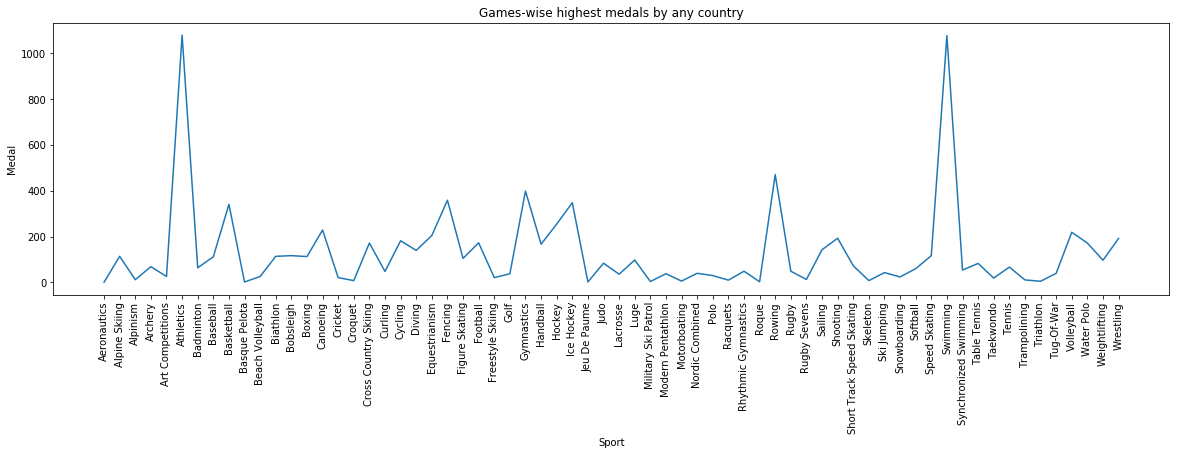

In [84]:
plt.figure(figsize=(20,5))
sns.lineplot(data=c_s2,x='Sport',y='Medal')
plt.xticks(rotation='vertical')
plt.title('Games-wise highest medals by any country')
plt.show()

In [85]:
x=c_s.groupby(['region','Sport'])['Medal'].count()
c_s2=c_s1.groupby(['Sport'])['Medal'].max().reset_index().sort_values('Medal',ascending=False)
def get_sport_max(sport):
    return c_s1[c_s1.Sport==sport].max()
get_sport_max('Polo')

region     USA
Sport     Polo
Medal       30
dtype: object

In [94]:
#Function to get Country-Medal stats
team_medal_count = df.groupby(['Team','Medal']).Medal.agg('count')
team_medal_count = team_medal_count.reset_index(name='count').sort_values(['count'], ascending=False)
def get_country_stats(country):
    return team_medal_count[team_medal_count.Team==country]
get_country_stats('India')

,Team,Medal,count
709,India,No_medal,1203
708,India,Gold,138
707,India,Bronze,40
710,India,Silver,19


In [88]:
df2=df[df['Medal']!='No_medal']

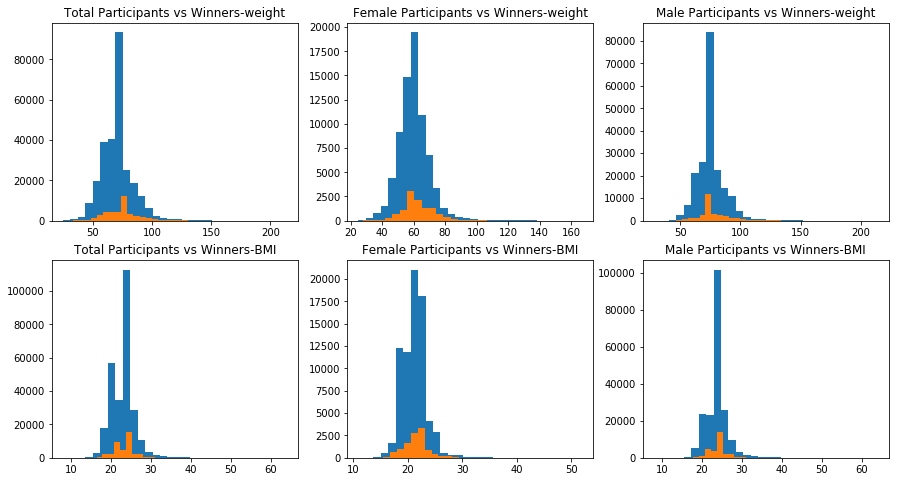

In [154]:
x,y=plt.subplots(2,3,figsize=(15,8))
y[0,0].hist(df.Weight,bins=30)
y[0,0].set_title('Total Participants vs Winners-weight')
y[0,1].hist(df[df.Gender=='F'].Weight,bins=30)
y[0,1].set_title('Female Participants vs Winners-weight')
y[0,2].hist(df[df.Gender=='M'].Weight,bins=30)
y[0,2].set_title('Male Participants vs Winners-weight')
y[0,0].hist(df2.Weight,bins=30)
y[0,1].hist(df2[df2.Gender=='F'].Weight,bins=30)
y[0,2].hist(df2[df2.Gender=='M'].Weight,bins=30)

y[1,0].hist(df.BMI,bins=30)
y[1,0].set_title('Total Participants vs Winners-BMI')
y[1,1].hist(df[df.Gender=='F'].BMI,bins=30)
y[1,1].set_title('Female Participants vs Winners-BMI')
y[1,2].hist(df[df.Gender=='M'].BMI,bins=30)
y[1,2].set_title('Male Participants vs Winners-BMI')
y[1,0].hist(df2.BMI,bins=30)
y[1,1].hist(df2[df2.Gender=='F'].BMI,bins=30)
y[1,2].hist(df2[df2.Gender=='M'].BMI,bins=30)
plt.show()


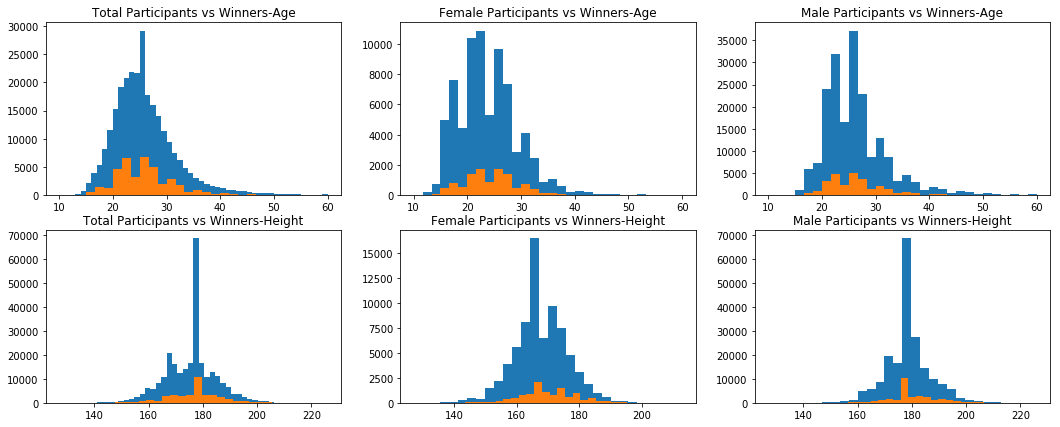

In [155]:
x,y=plt.subplots(2,3,figsize=(18,7))
y[0,0].hist(df.Age,bins=50,range=(10,60))
y[0,0].set_title('Total Participants vs Winners-Age')
y[0,1].hist(df[df.Gender=='F'].Age,bins=30,range=(10,60))
y[0,1].set_title('Female Participants vs Winners-Age')
y[0,2].hist(df[df.Gender=='M'].Age,bins=30,range=(10,60))
y[0,2].set_title('Male Participants vs Winners-Age')
y[0,0].hist(df2.Age,bins=30,range=(10,60))
y[0,1].hist(df2[df2.Gender=='F'].Age,bins=30,range=(10,60))
y[0,2].hist(df2[df2.Gender=='M'].Age,bins=30,range=(10,60))

y[1,0].hist(df.Height,bins=50)
y[1,0].set_title('Total Participants vs Winners-Height')
y[1,1].hist(df[df.Gender=='F'].Height,bins=30)
y[1,1].set_title('Female Participants vs Winners-Height')
y[1,2].hist(df[df.Gender=='M'].Height,bins=30)
y[1,2].set_title('Male Participants vs Winners-Height')
y[1,0].hist(df2.Height,bins=30)
y[1,1].hist(df2[df2.Gender=='F'].Height,bins=30)
y[1,2].hist(df2[df2.Gender=='M'].Height,bins=30)
plt.show()